# Import des bibliothèques et des jeux de données

---



In [ ]:
#Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
#Import des datasets
df_mob = pd.read_csv("/content/drive/MyDrive/LFB Mobilisation data from January 2009.csv", sep = ",", header = 0)
df_inc = pd.read_csv("/content/drive/MyDrive/LFB Incident data - Datastore - with notional cost and UPRN from January 2009.csv", sep = ",", header = 0)

In [ ]:
# Fusion des jeux de données en seul DataFrame et extraction des données à partir de 2016
df_mob = df_mob[df_mob.CalYear > 2016]
df_inc = df_inc[df_inc.CalYear > 2016]
df = df_mob.merge(right=df_inc, on = ["IncidentNumber", "CalYear", "HourOfCall"], how = "left")

In [ ]:
# Affichage des 5 premières lignes du Dataframe fusionné
display(df.head())

# Affichage des informations du Dataframe fusionné
display(df.info())

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000004-01012017,2017,0,4834035,E252,1,01/01/2017 00:06:18,01/01/2017 00:08:00,01/01/2017 00:20:13,102.0,...,835.0,Plumstead,NaN,NaN,1.0,1.0,1.0,1.0,326.0,1.0
1,000005-01012017,2017,0,4834036,A231,1,01/01/2017 00:06:34,01/01/2017 00:07:29,01/01/2017 00:10:31,55.0,...,237.0,Euston,NaN,NaN,1.0,1.0,1.0,1.0,326.0,1.0
2,000006-01012017,2017,0,4834038,F431,1,01/01/2017 00:07:58,01/01/2017 00:09:10,01/01/2017 00:12:40,72.0,...,282.0,Barking,NaN,NaN,1.0,2.0,2.0,3.0,978.0,1.0
3,000008-01012017,2017,0,4834041,G311,1,01/01/2017 00:12:44,01/01/2017 00:13:57,01/01/2017 00:19:39,73.0,...,415.0,Northolt,420.0,Northolt,1.0,2.0,2.0,1.0,326.0,1.0
4,000008-01012017,2017,0,4834040,G312,2,01/01/2017 00:12:44,01/01/2017 00:14:02,01/01/2017 00:19:44,78.0,...,415.0,Northolt,420.0,Northolt,1.0,2.0,2.0,1.0,326.0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 988460 entries, 0 to 988459
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          988460 non-null  object 
 1   CalYear                                 988460 non-null  int64  
 2   HourOfCall                              988460 non-null  int64  
 3   ResourceMobilisationId                  988460 non-null  int64  
 4   Resource_Code                           988460 non-null  object 
 5   PerformanceReporting                    988460 non-null  object 
 6   DateAndTimeMobilised                    988460 non-null  object 
 7   DateAndTimeMobile                       982350 non-null  object 
 8   DateAndTimeArrived                      988460 non-null  object 
 9   TurnoutTimeSeconds                      982331 non-null  float64
 10  TravelTimeSeconds                       9822

None

# Exploration

---



In [ ]:
#Description des rapports 'Incident' et 'Mobilisation'
print("Il y a", df_mob.shape[0], "lignes et", df_mob.shape[1], "colonnes dans le rapport des Mobilisations")
print("Il y a", df_inc.shape[0], "lignes et", df_inc.shape[1], "colonnes dans le rapport des Incidents")
print("Il y a", df.shape[0], "lignes et", df.shape[1], "colonnes dans le jeu de données fusionnées")

Il y a 988460 lignes et 22 colonnes dans le rapport des Mobilisations
Il y a 676438 lignes et 39 colonnes dans le rapport des Incidents
Il y a 988460 lignes et 58 colonnes dans le jeu de données fusionnées


In [ ]:
# Affichage d'un dataframe qui donne des valeurs clés pour l'inspection du contenu : type, % de valeurs manquantes, moyenne, nombre de valeurs uniques...
def summary(df):

    table = pd.DataFrame(
        index=df.columns,
        columns=['type_info', 'nb_NaN', '%_NaN', 'nb_unique_values', 'list_unique_values', 'dup', "mean_or_mode", "min", "max", "flag"])
    table.loc[:, 'type_info'] = df.dtypes.values # Affichage du type (object, float, etc.)
    table.loc[:, 'nb_NaN'] = df.isna().sum().values # Nombre de valeurs manquantes
    table.loc[:, '%_NaN'] = df.isna().sum().values / len(df) # Pourcentage de valeurs manquantes
    table.loc[:, 'nb_unique_values'] = df.nunique().values # Nombre de valeurs uniques
    table.loc[:, 'dup'] = df.duplicated().sum() # Nombre de doublons

    def get_list_unique_values(colonne):
      """Fonction pour extraction des valeurs uniques de chaque variable si leur nombre est inférieur à 6"""
      if colonne.nunique() < 6:
            return colonne.unique()
      else:
            return "Too many categories..." if colonne.dtypes == "O" else "Too many values..."

    def get_mean_mode(colonne):
      """Fonction pour extraction de la modalité la plus fréquente sur la variable est de type object ou de la moyenne si la variable est de type int ou float"""
      return colonne.mode()[0] if colonne.dtypes == "O" else colonne.mean()

    def alerts(colonne, thresh_na = 0.25, thresh_balance = 0.8):
      """Fonction qui crée une alerte si :
          - le taux de valeurs manquantes dans la variable est supérieur à 25%
          - la modalité la plus fréquente représente plus de 80% de la distribution (déséquilibre) """
      if (colonne.isna().sum()/len(df)) > thresh_na:
            return "Too many missing values ! "
      elif colonne.value_counts(normalize=True).values[0] > thresh_balance:
            return "It's imbalanced !"
      else:
            return "Nothing to report"

    table.loc[:, 'list_unique_values'] = df.apply(get_list_unique_values)
    table.loc[:, 'mean_or_mode'] = df.apply(get_mean_mode)
    table.loc[:, 'min'] = df.min() # Affichage de la plus petite valeur
    table.loc[:, 'max'] = df.max() # Affichage de la plus grande valeur
    table.loc[:, 'flag'] = df.apply(alerts)

    return table

summary(df)

,type_info,nb_NaN,%_NaN,nb_unique_values,list_unique_values,dup,mean_or_mode,min,max,flag
IncidentNumber,object,0,0.000000,639663,Too many categories...,0,053666-07052021,000001-01012022,213957-31122022,Nothing to report
CalYear,int64,0,0.000000,7,Too many values...,0,2019.7372,2017,2023,Nothing to report
HourOfCall,int64,0,0.000000,24,Too many values...,0,13.419951,0,23,Nothing to report
ResourceMobilisationId,int64,0,0.000000,988460,Too many values...,0,5590465.944435,4834035,6344481,Nothing to report
Resource_Code,object,0,0.000000,142,Too many categories...,0,A242,A211,H432,Nothing to report
PerformanceReporting,object,0,0.000000,3,"[1, 2, Not Used]",0,1,1,Not Used,Nothing to report
DateAndTimeMobilised,object,0,0.000000,655451,Too many categories...,0,10/12/2017 03:44:11,01/01/2017 00:06:18,31/12/2022 23:59:04,Nothing to report
DateAndTimeMobile,object,6110,0.006181,973313,Too many categories...,0,09/07/2019 18:43:02,NaN,NaN,Nothing to report
DateAndTimeArrived,object,0,0.000000,981785,Too many categories...,0,14/11/2022 01:53:04,01/01/2017 00:10:31,31/12/2022 23:52:03,Nothing to report
TurnoutTimeSeconds,float64,6129,0.006201,768,Too many values...,0,73.948692,0.0,1160.0,Nothing to report


In [ ]:
# Affichage des valeurs uniques de chaque variable de type objet
for i in df.columns:
  if df[i].dtypes == "O":
    print("\033[1m", i, "\033[0m")
    print(df[i].unique())

 IncidentNumber 
['000004-01012017' '000005-01012017' '000006-01012017' ...
 '045041-01042023' '045046-01042023' '045050-01042023']
 Resource_Code 
['E252' 'A231' 'F431' 'G311' 'G312' 'F241' 'G301' 'G302' 'F421' 'F351'
 'G272' 'A412' 'A211' 'A212' 'A301' 'F322' 'F331' 'F411' 'F381' 'G261'
 'G371' 'G361' 'G291' 'A331' 'A311' 'E371' 'F231' 'F451' 'H351' 'H281'
 'F441' 'H271' 'G222' 'H221' 'H222' 'G341' 'G331' 'A242' 'G382' 'H312'
 'H371' 'H311' 'F211' 'G381' 'G241' 'G242' 'G351' 'E381' 'H331' 'A411'
 'A361' 'A341' 'A322' 'E341' 'E392' 'F291' 'G221' 'F362' 'E271' 'H352'
 'A241' 'F361' 'F391' 'H251' 'H252' 'F371' 'A371' 'E361' 'E221' 'E211'
 'E291' 'H361' 'E421' 'F571' 'H382' 'A432' 'A431' 'F301' 'A281' 'G321'
 'F251' 'F221' 'F282' 'G251' 'A352' 'H341' 'E281' 'H291' 'G281' 'G211'
 'E431' 'H322' 'A402' 'A401' 'H421' 'H412' 'H411' 'H431' 'F281' 'E351'
 'H401' 'F432' 'G392' 'F321' 'H381' 'E301' 'E402' 'A342' 'A332' 'A351'
 'F261' 'F401' 'F422' 'G271' 'H242' 'E251' 'F412' 'G391' 'E232' 'E231'


In [ ]:
# Affichage des différentes valeurs de SpecialServiceType et du nombre d'interventions
df.groupby("SpecialServiceType")["IncidentNumber"].count().sort_values(ascending = False)

# Les interventions les plus fréquentes du type SpecialServiceType sont : les évacuations, les innondations, et les accidents de la route (RTC = Road Trafic Collisions)

SpecialServiceType
Effecting entry/exit               48817
Flooding                           44703
RTC                                37846
No action (not false alarm)        17940
Assist other agencies              10472
Lift Release                       10184
Making Safe (not RTC)               7513
Hazardous Materials incident        6991
Medical Incident                    5026
Spills and Leaks (not RTC)          4771
Animal assistance incidents         4353
Advice Only                         4231
Removal of objects from people      3180
Other rescue/release of persons     3054
Other Transport incident            2441
Suicide/attempts                    2166
Evacuation (no fire)                1472
Rescue or evacuation from water      803
Stand By                             649
Medical Incident - Co-responder      629
Water provision                        6
Name: IncidentNumber, dtype: int64

# Visualisation

---





<Axes: >

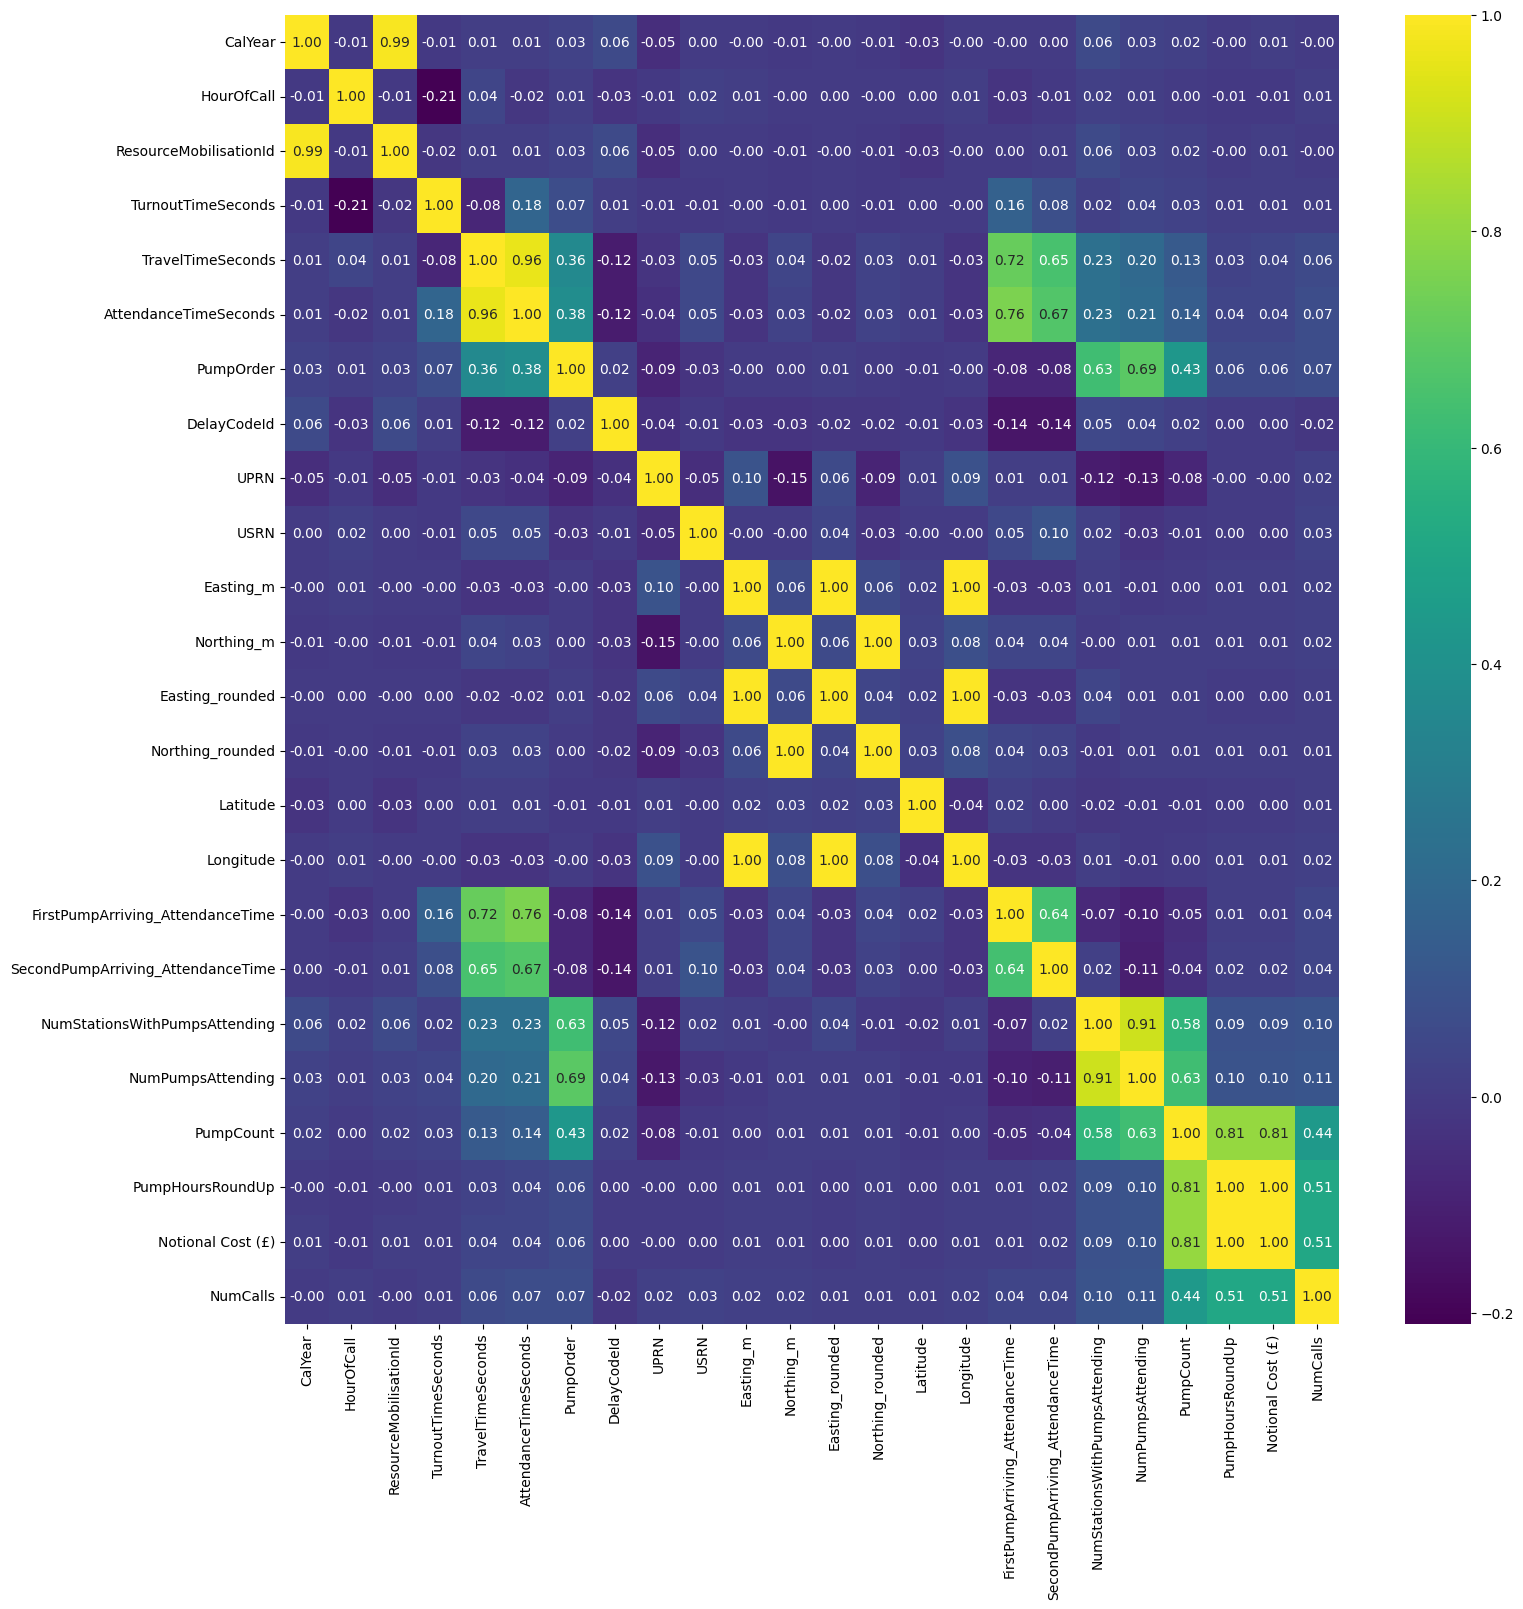

In [ ]:
# Heatmap : corrélation entre les valeurs continues
fig, ax = plt.subplots(figsize=(17, 17))
corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')

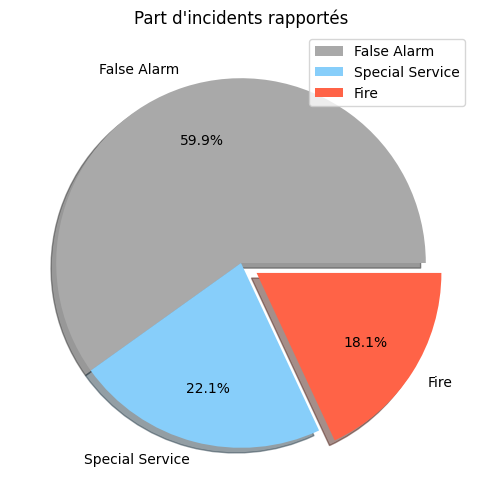

In [ ]:
# Répartition des types d'incidents rapportés (Pie Chart)

plt.figure(figsize=(6, 6))

x = df['IncidentGroup'].value_counts()

labels=['False Alarm', 'Special Service', 'Fire']
colors=['#A9A9A9','#87CEFA','#FF6347']
explode=[0, 0, 0.1]
autopct='%1.1f%%'
pctdistance=0.7
labeldistance=1.1
shadow=True

plt.pie(x=x, labels=labels, colors=colors, explode=explode, autopct=autopct,
        pctdistance=pctdistance, labeldistance=labeldistance, shadow=shadow)

plt.title("Part d'incidents rapportés")
plt.legend()
plt.show()

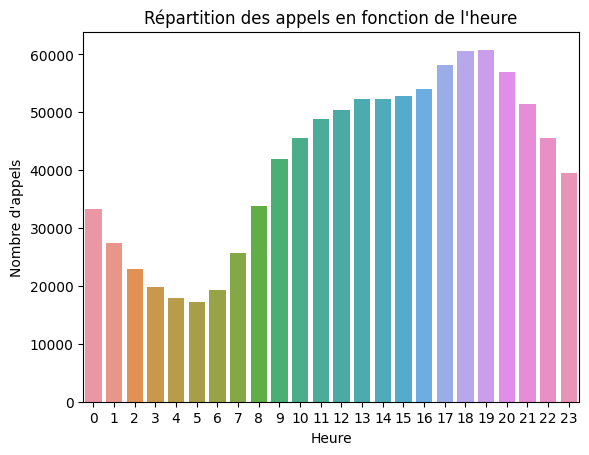

In [ ]:
# Répartition des appels en fonction de l'heure

sns.countplot(data=df, x="HourOfCall")
plt.xlabel('Heure')
plt.ylabel("Nombre d'appels")
plt.title("Répartition des appels en fonction de l'heure");

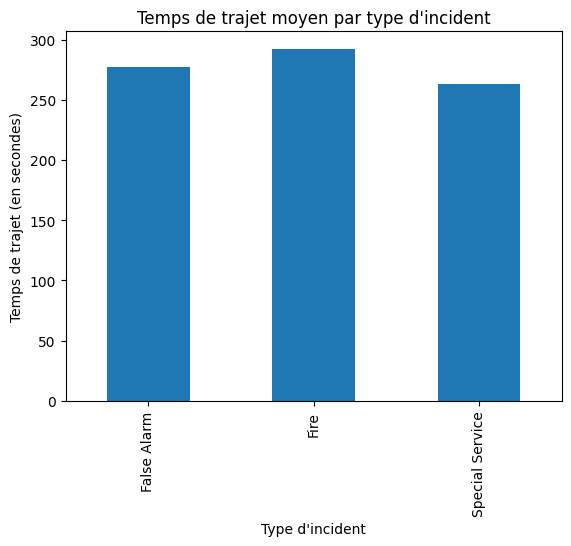

In [ ]:
# Temps de trajet moyen par type d'incident

df_grouped = df.groupby('IncidentGroup')['TravelTimeSeconds'].mean()

df_grouped.plot(kind='bar')
plt.title("Temps de trajet moyen par type d'incident")
plt.xlabel("Type d'incident")
plt.ylabel('Temps de trajet (en secondes)')

plt.show()

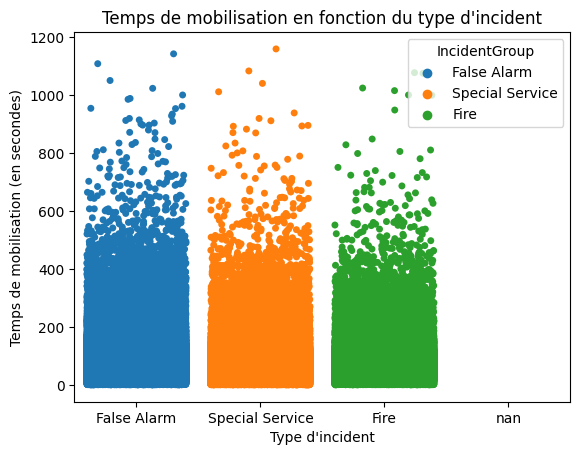

In [ ]:
#Graphique 4 : Temps de mobilisation en fonction du type d'incident

# Création d'un nouveau DataFrame pour chaque catégorie d'incident
special_service_df = df[df['IncidentGroup'] == 'Special Service']
fire_df = df[df['IncidentGroup'] == 'Fire']
false_alarm_df = df[df['IncidentGroup'] == 'False Alarm']

special_service_df['x_offset'] = 0
fire_df['x_offset'] = 0.2
false_alarm_df['x_offset'] = -0.2

combined_df = pd.concat([special_service_df, fire_df, false_alarm_df])

# Graph de dispersion des données
sns.stripplot(x='IncidentGroup', y='TurnoutTimeSeconds', data=df, hue='IncidentGroup', jitter=0.4)

# Légende
plt.title('Temps de mobilisation en fonction du type d\'incident')
plt.xlabel('Type d\'incident')
plt.ylabel('Temps de mobilisation (en secondes)')

plt.show()



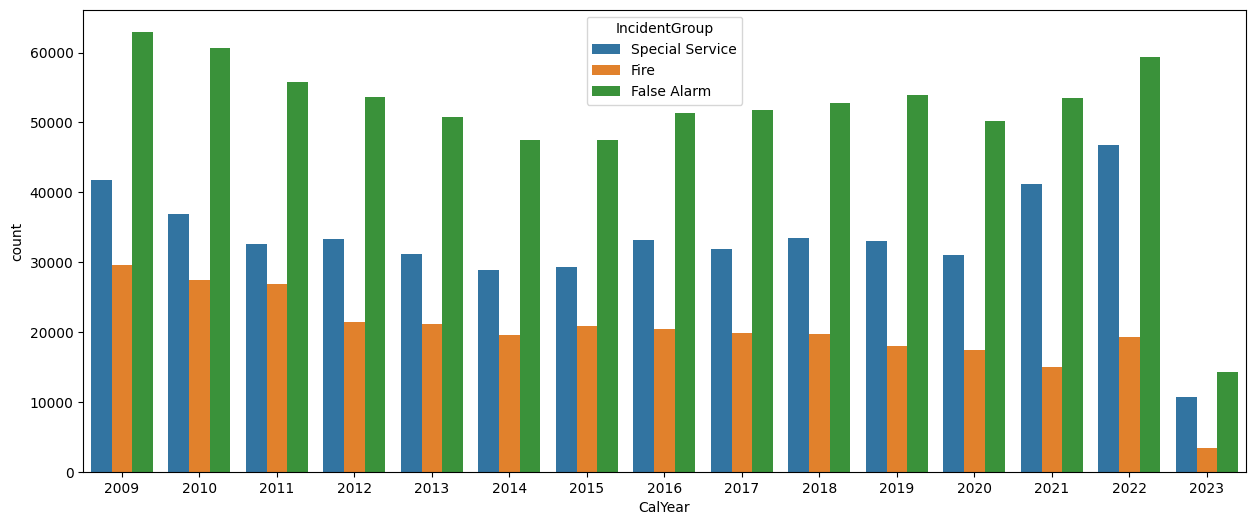

In [ ]:
#Graphique 5 : Répartition des types d'incidents par an
df_inc_total = pd.read_csv("/content/drive/MyDrive/LFB Incident data - Datastore - with notional cost and UPRN from January 2009.csv", sep = ",", header = 0)
plt.figure(figsize=(15,6))
sns.countplot(x="CalYear", hue = "IncidentGroup", data=df_inc_total);


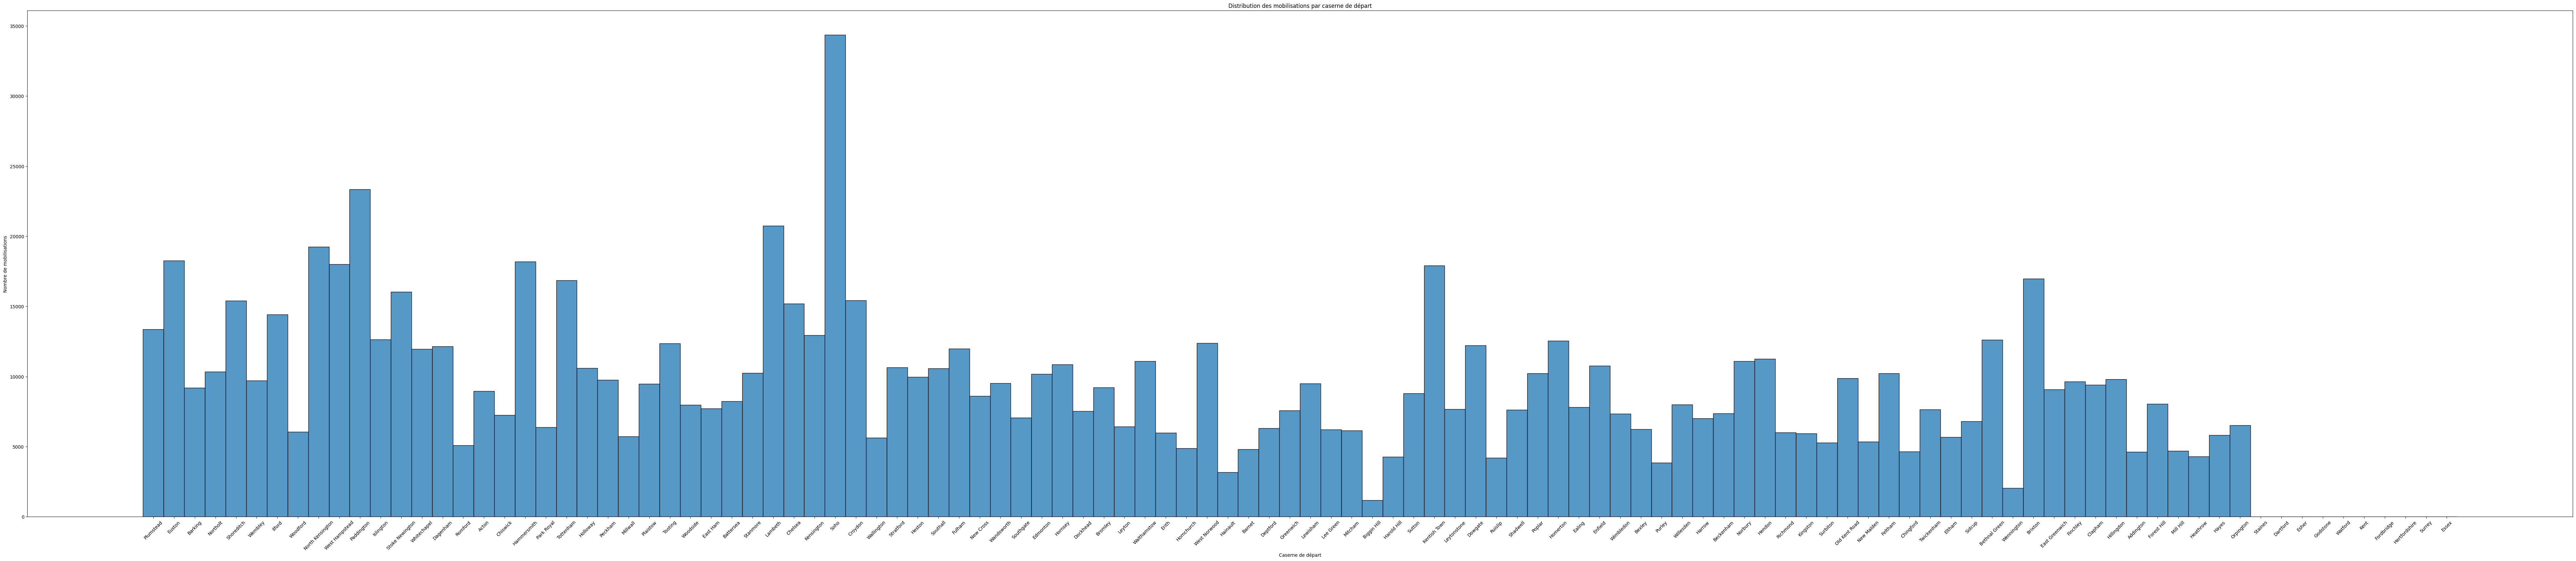

In [ ]:
#Graphique 6 : Distribution des mobilisations en fonction des casernes

plt.figure(figsize = (100, 20))
sns.histplot(x='DeployedFromStation_Name', bins=1, data=df)

plt.title('Distribution des mobilisations par caserne de départ')
plt.xlabel('Caserne de départ')
plt.ylabel('Nombre de mobilisations')
plt.xticks(rotation=45)
plt.show()


# Tests statistiques

---



In [ ]:
# Test de khi2 sur les variables 'PropertyCategory' et 'IncidentGroup'

#1 - Création d'une table de contingence

cont = pd.crosstab(df['PropertyCategory'], df['IncidentGroup'])
cont.head()

#2 - Hypothèses

#H0 : la variable de catégorie d'incident est indépendante du type d'incident
#H1 : la variable de catégorie d'incident n'est pas indépendante du type d'incident

#3 - Test chi2 d'indépendance
from scipy.stats import chi2_contingency
resultats_chi2 = chi2_contingency(cont)

statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]
print("La statistique du test est : ", statistique, "\n"
      "La p-valeur du test est : ", p_valeur, "\n")

#4 - Résultat
print("Conclusion : p-val très petite (< 0.05) => on rejette H0 et on accepte H1.")

La statistique du test est :  324407.49238033197 
La p-valeur du test est :  0.0 

Conclusion : p-val très petite (< 0.05) => on rejette H0 et on accepte H1.


In [ ]:
# Test ANOVA sur les variables IncidentGroup et TurnoutTimeSeconds

# H0 : il n'y a pas d'effect significatif de l'IncidentGroup sur le TurnoutTimeSeconds
# H1 : il y a un effect significatif de l'IncidentGroup sur le TurnoutTimeSeconds

import statsmodels.api

result = statsmodels.formula.api.ols('TurnoutTimeSeconds ~ IncidentGroup', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

## La conclusion :
print("Conclusion : La p-value (PR(>F)) est inférieure à 5%. On accepte donc l'hypothèse\nd'un effet significatif de l'IncidentGroup sur le TurnOutTimeSeconds")

,df,sum_sq,mean_sq,F,PR(>F)
IncidentGroup,2.0,2.926365e+04,14631.825714,9.322918,0.000089
Residual,978601.0,1.535862e+09,1569.447065,NaN,NaN


Conclusion : La p-value (PR(>F)) est inférieure à 5%. On accepte donc l'hypothèse
d'un effet significatif de l'IncidentGroup sur le TurnOutTimeSeconds


In [ ]:
# Test de Pearson sur les variables HourOfCall et TravelTimeSeconds

# Suppression les NaN pour application du test de Pearson
dfp = df[["HourOfCall", "TravelTimeSeconds"]].dropna(axis = 0)

from scipy.stats import pearsonr

x = dfp['HourOfCall']
y = dfp['TravelTimeSeconds']
p = pearsonr(x,y)

print("p-value: ", p[1])
print("coefficient: ", p[0])

#Test de Spearman car coefficient de Pearson proche de zéro

from scipy.stats import spearmanr

s = spearmanr(x, y)[0]
p = pearsonr(x,y)[0]
print("Pearson :", p, "//", "Spearman : ", s)

p-value:  0.0
coefficient:  0.03895341240201859
Pearson : 0.03895341240201859 // Spearman :  0.025354171246254914


# Nettoyage et pre-processing

---



In [ ]:
# Création de la variable cible 'ReactionTime' : au TurnOutTime + TravelTimeSeconds
# Le résultat est rendu en format 'int' qui correspond à un temps en secondes.
df["ReactionTime"] = df["TurnoutTimeSeconds"] + df["TravelTimeSeconds"]

In [ ]:
# Conversion des variables de date (temps) en datetime en spécifiant le format affiché
df['DateOfCall'] = pd.to_datetime(df['DateOfCall'], format='%d %b %Y')
df['TimeOfCall'] = pd.to_datetime(df['TimeOfCall'], format='%H:%M:%S')

# Extraction de l'année, du mois, du jour, et du jour de la semaine à partir des données datées
df["YearOfCall"] = df["DateOfCall"].dt.year
df["MonthOfCall"] = df["DateOfCall"].dt.month
df["DayOfCall"] = df["DateOfCall"].dt.day
df["DayOfWeekOfCall"] = df["DateOfCall"].dt.dayofweek

In [ ]:
# Filtre du Dataframe en conservant les colonnes pertinentes dans une liste
colonnes = ["IncidentGroup", "StopCodeDescription", "SpecialServiceType", "PropertyCategory", "PropertyType", "Postcode_district", "IncGeo_BoroughName",
            "IncGeo_WardNameNew", "IncidentStationGround", "FirstPumpArriving_AttendanceTime", "FirstPumpArriving_DeployedFromStation", "NumStationsWithPumpsAttending",
            "NumPumpsAttending", "PumpCount", "ResourceMobilisationId", "PerformanceReporting", "DeployedFromStation_Name", "DeployedFromLocation", "PlusCode_Code",
            "DelayCode_Description","ReactionTime", "YearOfCall","MonthOfCall", "DayOfCall", "DayOfWeekOfCall","HourOfCall"]
df = df[colonnes]

In [ ]:
# Suppression des valeurs manquantes dans les entrées (lignes) du Dataframe
df = df.dropna(axis = 0, how = "any", subset = ["IncidentStationGround", "NumStationsWithPumpsAttending", "NumPumpsAttending","PumpCount",
                                                "DeployedFromStation_Name", "DeployedFromLocation", "FirstPumpArriving_DeployedFromStation", "ReactionTime", "IncGeo_WardNameNew"])

In [ ]:
# Remplacement des valeurs manquantes manquantes par 'Not a Special Service" pour la variable SpecialServiceType
df["SpecialServiceType"] = df["SpecialServiceType"].fillna("Not a Special Service")

In [ ]:
# Remplacement des vlaeurs manquantes du DelayCode_Description par la modalité la plus fréquente qui "not held up" (pas de retard)
df["DelayCode_Description"].fillna(df["DelayCode_Description"].mode()[0], inplace=True)

In [ ]:
# Vérification de la présence de valeurs manquantes
print("Nombre de valeurs manquantes dans le jeu données final :", df.isna().sum().sum())

# Affichage des dimensions (lignes et colonnes) du dataset final
print("Il y a", df.shape[0], "lignes et", df.shape[1], "colonnes dans le jeu de données final")

Nombre de valeurs manquantes dans le jeu données final : 0
Il y a 977708 lignes et 26 colonnes dans le jeu de données final


In [ ]:
# Affichage des 5 premières lignes du dataset final
df.head()

,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,IncidentStationGround,FirstPumpArriving_AttendanceTime,...,DeployedFromStation_Name,DeployedFromLocation,PlusCode_Code,DelayCode_Description,ReactionTime,YearOfCall,MonthOfCall,DayOfCall,DayOfWeekOfCall,HourOfCall
0,False Alarm,AFA,Not a Special Service,Non Residential,Engineering manufacturing plant,SE2,GREENWICH,Abbey Wood,Plumstead,835.0,...,Plumstead,Home Station,Initial,"Traffic, roadworks, etc",835.0,2017.0,1.0,1.0,6.0,0
1,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,N1,ISLINGTON,Caledonian,Euston,237.0,...,Euston,Home Station,Initial,Not held up,237.0,2017.0,1.0,1.0,6.0,0
2,Fire,Primary Fire,Not a Special Service,Non Residential,Restaurant/cafe,IG11,BARKING AND DAGENHAM,Northbury,Barking,282.0,...,Barking,Home Station,Initial,Not held up,282.0,2017.0,1.0,1.0,6.0,0
3,Fire,Secondary Fire,Not a Special Service,Outdoor,Loose refuse,UB6,EALING,Central Greenford,Northolt,415.0,...,Northolt,Home Station,Initial,Not held up,415.0,2017.0,1.0,1.0,6.0,0
4,Fire,Secondary Fire,Not a Special Service,Outdoor,Loose refuse,UB6,EALING,Central Greenford,Northolt,415.0,...,Northolt,Home Station,Initial,Not held up,420.0,2017.0,1.0,1.0,6.0,0


# Transformation

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor

In [ ]:
#Séparation des dataframe avec X et y
y = df['ReactionTime']
X = df.drop('ReactionTime', axis=1)

#Identification des colonnes catégorielles
cat_cols = X.select_dtypes(include=['object']).columns

#Encodage des données catégorielles avec labelencoder
label_encoder = LabelEncoder()
X[cat_cols] = X[cat_cols].apply(label_encoder.fit_transform)

#Normalisation des données avec standardscaler
scaler = StandardScaler()
#Application aux colonnes numériques
num_cols = X.select_dtypes(include=['int64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

#Création d'un ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# Modélisation
---



## **1 - Régression avec SGDRegressor**

In [ ]:
#Entrainement du modèle SGDRegressor
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, y_train)

SGDRegressor()

In [ ]:
print('Coefficient de détermination du modèle SGDRegressor sur train:', sgd_regressor.score(X_train, y_train))
print('Coefficient de détermination du modèle SGDRegressor sur test:', sgd_regressor.score(X_test, y_test))

Coefficient de détermination du modèle SGDRegressor sur train: -2.894215413416973e+24
Coefficient de détermination du modèle SGDRegressor sur test: -2.8742347349322317e+24


In [ ]:
#Evaluation du modèle de régression
y_pred = sgd_regressor.predict(X_test)

#Erreur quadratique moyenne (RMSE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Le résultat de la RMSE est :', rmse)

#Coefficient de détermination --> Plus le résultat est proche de 1, plus les perf sont bonnes
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Le résultat du coefficient de détermination est :', r2)

#Erreur absolue moyenne (MAE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Le résultat de la MAE est :', mae)

Le résultat de la RMSE est : 252447953255297.3
Le résultat du coefficient de détermination est : -2.8742347349322317e+24
Le résultat de la MAE est : 239345126258939.7


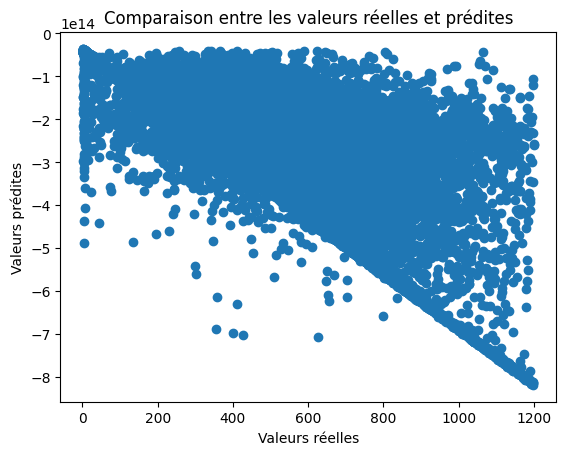

In [ ]:
#Graphique de dispersion entre les valeurs réelles et les valeurs prédites
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison entre les valeurs réelles et prédites")
plt.show()

## **2 - Régression avec Régression linéaire**

In [ ]:
#Entrainement du modèle LinearRegression
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

print('Coefficient de détermination du modèle sur train:', linear_regressor.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', linear_regressor.score(X_test, y_test))

Coefficient de détermination du modèle sur train: 0.771852583601938
Coefficient de détermination du modèle sur test: 0.7744495707087306


In [ ]:
#Evaluation du modèle de régression
y_pred = linear_regressor.predict(X_test)

#Erreur quadratique moyenne (RMSE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Le résultat de la RMSE est :', rmse)

#Coefficient de détermination --> Plus le résultat est proche de 1, plus les perf sont bonnes
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Le résultat du coefficient de détermination est :', r2)

#Erreur absolue moyenne (MAE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Le résultat de la MAE est :', mae)

Le résultat de la RMSE est : 70.7184227971985
Le résultat du coefficient de détermination est : 0.7744495707087306
Le résultat de la MAE est : 36.32555193365113


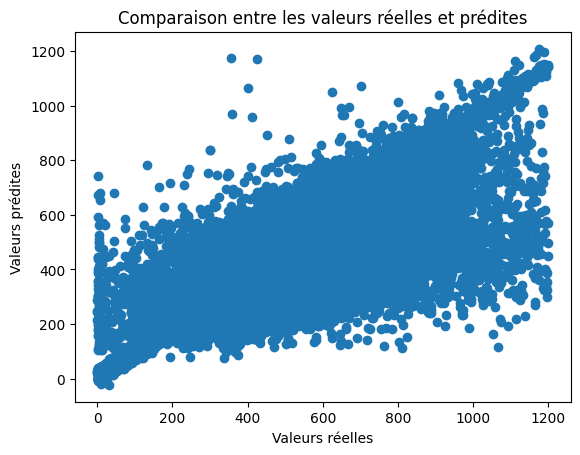

In [ ]:
#Graphique de dispersion entre les valeurs réelles et les valeurs prédites
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison entre les valeurs réelles et prédites")
plt.show()

## **3 - Régression avec Régression Ridge**

In [ ]:
#Entrainement du modèle RidgeRegression
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=0.5)
ridge_regression.fit(X_train, y_train)

print('Coefficient de détermination du modèle sur train:', ridge_regression.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', ridge_regression.score(X_test, y_test))

Coefficient de détermination du modèle sur train: 0.7718525835960275
Coefficient de détermination du modèle sur test: 0.7744495710160532


In [ ]:
#Evaluation du modèle de régression
y_pred = ridge_regression.predict(X_test)

#Erreur quadratique moyenne (RMSE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Le résultat de la RMSE est :', rmse)

#Coefficient de détermination --> Plus le résultat est proche de 1, plus les perf sont bonnes
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Le résultat du coefficient de détermination est :', r2)

#Erreur absolue moyenne (MAE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Le résultat de la MAE est :', mae)

Le résultat de la RMSE est : 70.71842274901998
Le résultat du coefficient de détermination est : 0.7744495710160532
Le résultat de la MAE est : 36.3255269850531


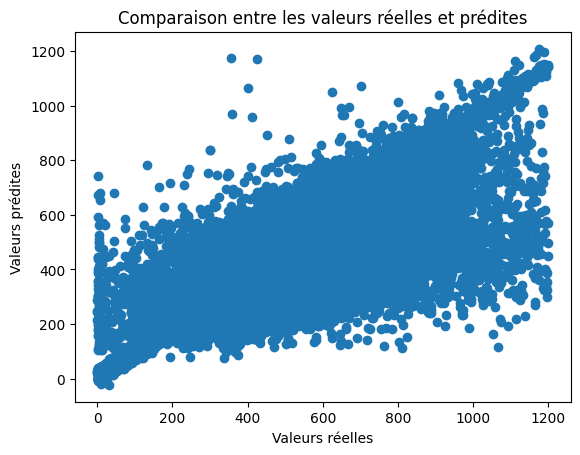

In [ ]:
#Graphique de dispersion entre les valeurs réelles et les valeurs prédites
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison entre les valeurs réelles et prédites")
plt.show()

## **4 - Régression avec Régression Lasso**

In [ ]:
#Entrainement du modèle LassoRegression
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.5)
lasso_regression.fit(X_train, y_train)

print('Coefficient de détermination du modèle sur train:', lasso_regression.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', lasso_regression.score(X_test, y_test))

Coefficient de détermination du modèle sur train: 0.7713868527042098
Coefficient de détermination du modèle sur test: 0.7740073367053066


In [ ]:
#Evaluation du modèle de régression
y_pred = lasso_regression.predict(X_test)

#Erreur quadratique moyenne (RMSE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Le résultat de la RMSE est :', rmse)

#Coefficient de détermination --> Plus le résultat est proche de 1, plus les perf sont bonnes
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Le résultat du coefficient de détermination est :', r2)

#Erreur absolue moyenne (MAE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Le résultat de la MAE est :', mae)

Le résultat de la RMSE est : 70.78771722650718
Le résultat du coefficient de détermination est : 0.7740073367053066
Le résultat de la MAE est : 35.62338807985376


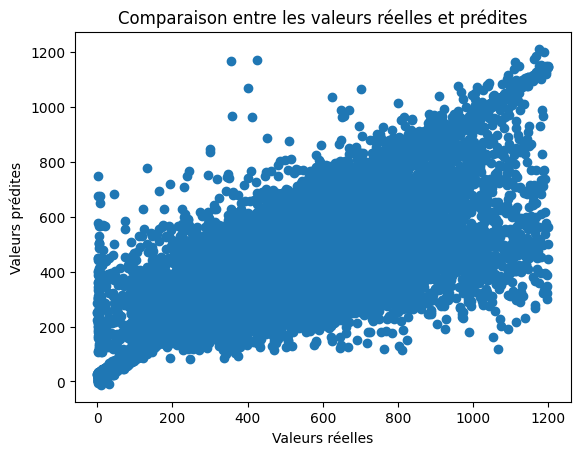

In [ ]:
#Graphique de dispersion entre les valeurs réelles et les valeurs prédites
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison entre les valeurs réelles et prédites")
plt.show()

## **5 - Régression avec Régression ElasticNet**

In [ ]:
#Entrainement du modèle ElasticNet Regression
from sklearn.linear_model import ElasticNet

elasticnet_regression = ElasticNet(alpha=0.5)
elasticnet_regression.fit(X_train, y_train)

print('Coefficient de détermination du modèle sur train:', elasticnet_regression.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', elasticnet_regression.score(X_test, y_test))

Coefficient de détermination du modèle sur train: 0.7579360017587914
Coefficient de détermination du modèle sur test: 0.7608924033045475


In [ ]:
#Evaluation du modèle de régression
y_pred = elasticnet_regression.predict(X_test)

#Erreur quadratique moyenne (RMSE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Le résultat de la RMSE est :', rmse)

#Coefficient de détermination --> Plus le résultat est proche de 1, plus les perf sont bonnes
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Le résultat du coefficient de détermination est :', r2)

#Erreur absolue moyenne (MAE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Le résultat de la MAE est :', mae)

Le résultat de la RMSE est : 72.8127484123143
Le résultat du coefficient de détermination est : 0.7608924033045475
Le résultat de la MAE est : 37.01054674093635


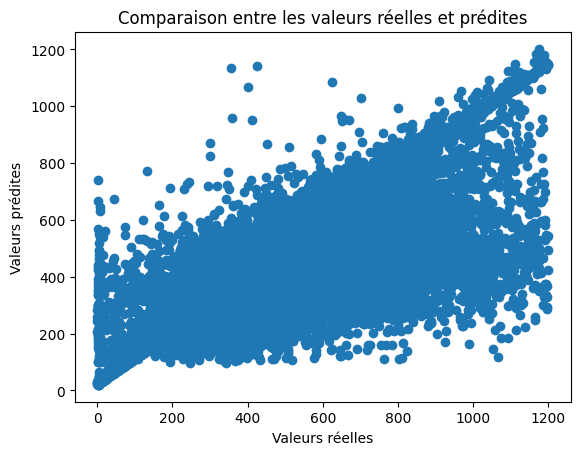

In [ ]:
#Graphique de dispersion entre les valeurs réelles et les valeurs prédites
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison entre les valeurs réelles et prédites")
plt.show()

## **6 - Régression avec Régression Polynomiale**

In [ ]:
#Entrainement du modèle Regression polynomiale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

linearp_regression = LinearRegression()
linearp_regression.fit(X_train_poly, y_train)


print('Coefficient de détermination du modèle LinearRegression sur train:', linearp_regression.score(X_train_poly, y_train))
print('Coefficient de détermination du modèle LinearRegression sur test:', linearp_regression.score(X_test_poly, y_test))

Coefficient de détermination du modèle LinearRegression sur train: 0.7924346209636794
Coefficient de détermination du modèle LinearRegression sur test: 0.7940003443083014


In [ ]:
#Evaluation du modèle de régression
y_pred = linearp_regression.predict(X_test_poly)

#Erreur quadratique moyenne (RMSE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Le résultat de la RMSE est :', rmse)

#Coefficient de détermination --> Plus le résultat est proche de 1, plus les perf sont bonnes
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Le résultat du coefficient de détermination est :', r2)

#Erreur absolue moyenne (MAE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Le résultat de la MAE est :', mae)

Le résultat de la RMSE est : 67.58401435990113
Le résultat du coefficient de détermination est : 0.7940003443083014
Le résultat de la MAE est : 33.55194242178581


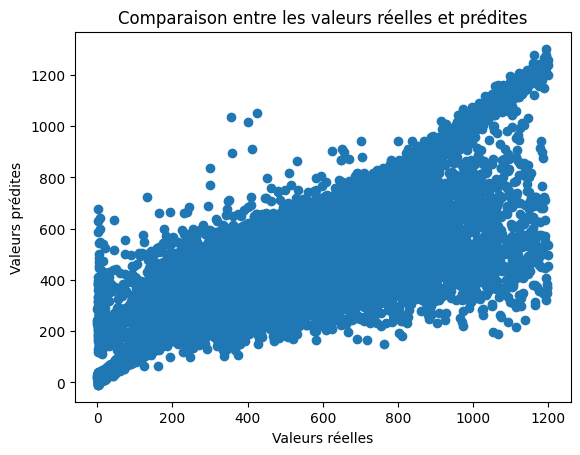

In [ ]:
#Graphique de dispersion entre les valeurs réelles et les valeurs prédites
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison entre les valeurs réelles et prédites")
plt.show()

## **7 - Régression avec Arbre de décision (DecisionTree)**

In [ ]:
#Entrainement du modèle DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

print('Coefficient de détermination du modèle DecisionTree sur train:', decision_tree.score(X_train, y_train))
print('Coefficient de détermination du modèle DecisionTree sur test:', decision_tree.score(X_test, y_test))

Coefficient de détermination du modèle DecisionTree sur train: 1.0
Coefficient de détermination du modèle DecisionTree sur test: 0.6701598533006383


In [ ]:
#Evaluation du modèle de régression
y_pred = decision_tree.predict(X_test)

#Erreur quadratique moyenne (RMSE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Le résultat de la RMSE est :', rmse)

#Coefficient de détermination --> Plus le résultat est proche de 1, plus les perf sont bonnes
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Le résultat du coefficient de détermination est :', r2)

#Erreur absolue moyenne (MAE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Le résultat de la MAE est :', mae)

Le résultat de la RMSE est : 85.5189765272499
Le résultat du coefficient de détermination est : 0.6701598533006383
Le résultat de la MAE est : 32.40251710629941


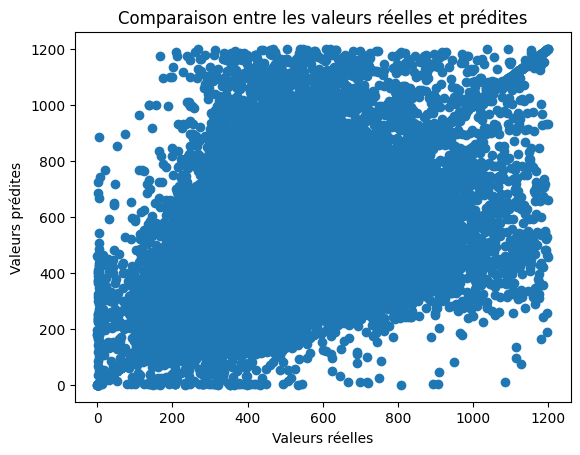

In [ ]:
#Graphique de dispersion entre les valeurs réelles et les valeurs prédites
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison entre les valeurs réelles et prédites")
plt.show()

## **8 - Régression avec forêts aléatoires (Random Forest Regression)**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train, y_train)

print('Coefficient de détermination du modèle sur train:', rfr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rfr.score(X_test, y_test))

Coefficient de détermination du modèle sur train: 0.9741233960788809
Coefficient de détermination du modèle sur test: 0.8108896464017089


In [ ]:
#Evaluation du modèle de régression
y_pred = rfr.predict(X_test)

#Erreur quadratique moyenne (RMSE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Le résultat de la RMSE est :', rmse)

#Coefficient de détermination --> Plus le résultat est proche de 1, plus les perf sont bonnes
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Le résultat du coefficient de détermination est :', r2)

#Erreur absolue moyenne (MAE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Le résultat de la MAE est :', mae)

Le résultat de la RMSE est : 63.46085220474215
Le résultat du coefficient de détermination est : 0.8108896464017089
Le résultat de la MAE est : 25.569015846538782


<Axes: >

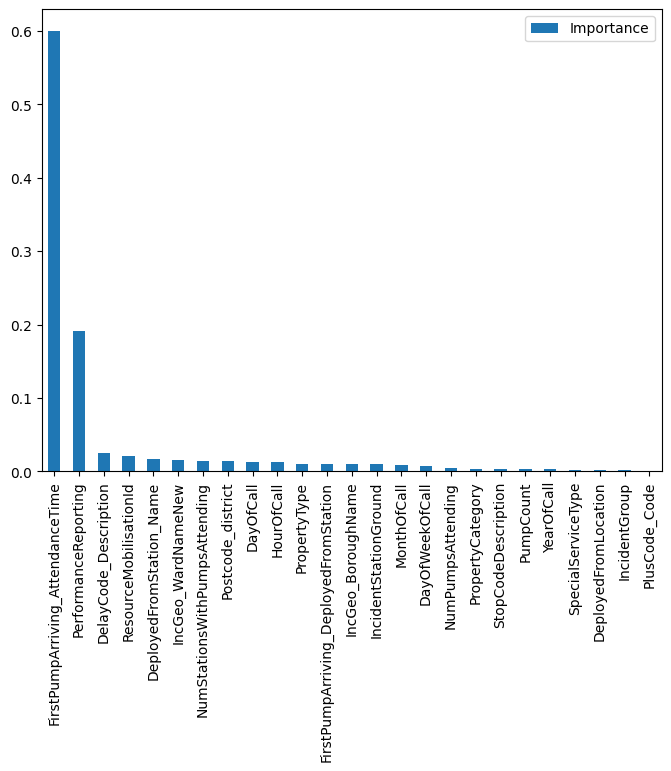

In [ ]:
feat_importances = pd.DataFrame(rfr.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## **10 - Régression avec voisins les plus proches (K-Nearest Neighbors Regression)**

In [ ]:
#Entrainement du modèle K-nearest

from sklearn.neighbors import KNeighborsRegressor

k = 5  # Valeur du nombre de voisins
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

print('Coefficient de détermination du modèle sur train:', knn.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', knn.score(X_test, y_test))

Coefficient de détermination du modèle sur train: 0.7788111298364305
Coefficient de détermination du modèle sur test: 0.6799086169046644


In [ ]:
#Evaluation du modèle de régression
y_pred = knn.predict(X_test)

#Erreur quadratique moyenne (RMSE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Le résultat de la RMSE est :', rmse)

#Coefficient de détermination --> Plus le résultat est proche de 1, plus les perf sont bonnes
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Le résultat du coefficient de détermination est :', r2)

#Erreur absolue moyenne (MAE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Le résultat de la MAE est :', mae)

Le résultat de la RMSE est : 84.24569719203372
Le résultat du coefficient de détermination est : 0.6799086169046644
Le résultat de la MAE est : 43.19306645119719


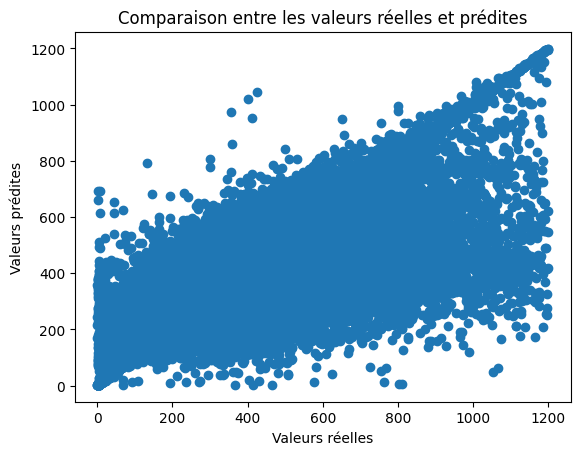

In [ ]:
#Graphique de dispersion entre les valeurs réelles et les valeurs prédites
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison entre les valeurs réelles et prédites")
plt.show()

## **11 - Régression avec réseau de neurones (Neural Network)**

In [ ]:
#Entrainement du modèle Neural Network

from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=8)
nn.fit(X_train, y_train)

print('Coefficient de détermination du modèle sur train:', nn.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', nn.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Coefficient de détermination du modèle sur train: 0.8199611823863325
Coefficient de détermination du modèle sur test: 0.8220192355994939


In [ ]:
#Evaluation du modèle de régression
y_pred = nn.predict(X_test)

#Erreur quadratique moyenne (RMSE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Le résultat de la RMSE est :', rmse)

#Coefficient de détermination --> Plus le résultat est proche de 1, plus les perf sont bonnes
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Le résultat du coefficient de détermination est :', r2)

#Erreur absolue moyenne (MAE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Le résultat de la MAE est :', mae)

Le résultat de la RMSE est : 62.81990438534496
Le résultat du coefficient de détermination est : 0.8220192355994939
Le résultat de la MAE est : 27.654378270851392


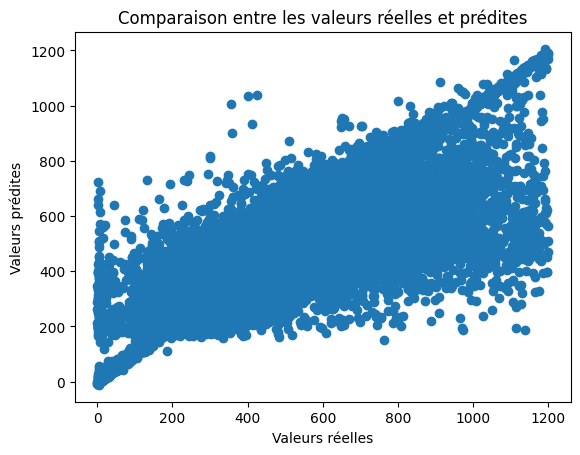

In [ ]:
#Graphique de dispersion entre les valeurs réelles et les valeurs prédites
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison entre les valeurs réelles et prédites")
plt.show()

# Optimisation

---



## Hyperparamètres : n_estimators 10/20/50, max_depth 3/5/7

---



In [ ]:
#Recherche des meilleurs hyperparamètres
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
grid = {'n_estimators': [10, 20, 50], 'max_features': ['sqrt','log2'], 'max_depth' : [3, 5, 7], 'random_state' : [18]}
grid_search = GridSearchCV(estimator = rfr, param_grid = grid, cv=5, scoring="r2")

In [ ]:
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_params_
print(best_grid)

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 10, 'random_state': 18}


In [ ]:
best_rfr = RandomForestRegressor(**best_grid)
best_rfr.fit(X_train, y_train)

print('Coefficient de détermination du modèle sur train:', best_rfr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', best_rfr.score(X_test, y_test))

Coefficient de détermination du modèle sur train: 0.721325787742485
Coefficient de détermination du modèle sur test: 0.724350739881646


## Hyperparamètres : n_estimators 25/50/100, max_depth 3/5/7


In [ ]:
grid = {'n_estimators': [25, 50, 100], 'max_features': ['sqrt','log2'], 'max_depth' : [3, 5, 7], 'random_state' : [18]}
grid_search = GridSearchCV(estimator = rfr, param_grid = grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_params_

print(best_grid)

best_rfr = RandomForestRegressor(**best_grid)
best_rfr.fit(X_train, y_train)
print('Coefficient de détermination du modèle sur train:', best_rfr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', best_rfr.score(X_test, y_test))

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 25, 'random_state': 18}
Coefficient de détermination du modèle sur train: 0.6722971439661484
Coefficient de détermination du modèle sur test: 0.6514747621592706


## Hyperparamètres : n_estimators 50/100/200, max_depth 3/5/7


In [ ]:
rfr = RandomForestRegressor()

grid = {'n_estimators': [50, 100, 200], 'max_features': ['sqrt','log2'], 'max_depth' : [None, 3, 5, 7], 'random_state' : [18]}
grid_search = GridSearchCV(estimator = rfr, param_grid = grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_params_

print(best_grid)

best_rfr = RandomForestRegressor(**best_grid)
best_rfr.fit(X_train, y_train)

print('Coefficient de détermination du modèle sur train:', best_rfr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', best_rfr.score(X_test, y_test))

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 18}
Coefficient de détermination du modèle sur train: 0.6912337112639961
Coefficient de détermination du modèle sur test: 0.6716181167937237


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 700, random_state = 42)
rfr.fit(X_train, y_train)

print('Coefficient de détermination du modèle sur train:', rfr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', rfr.score(X_test, y_test))

Coefficient de détermination du modèle sur train: 0.9749107488865174
Coefficient de détermination du modèle sur test: 0.8122578208952973


In [ ]:
#Evaluation du modèle de régression
y_pred = rfr.predict(X_test)

#Erreur quadratique moyenne (RMSE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Le résultat de la RMSE est :', rmse)

#Coefficient de détermination --> Plus le résultat est proche de 1, plus les perf sont bonnes
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Le résultat du coefficient de détermination est :', r2)

#Erreur absolue moyenne (MAE) --> Plus la valeur est proche de 0, meilleures sont les perf du modèle
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Le résultat de la MAE est :', mae)

Le résultat de la RMSE est : 63.46085220474215
Le résultat du coefficient de détermination est : 0.8108896464017089
Le résultat de la MAE est : 25.569015846538782
